In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib
import matplotlib.pyplot as plt

train = pd.read_csv('data/application_train.csv', delimiter=',')
test = pd.read_csv('data/application_test.csv', delimiter=',')

In [2]:
plt.style.use('dark_background')

Мне больше нравится работать отдельно с таргетом и отельно с фичами (тут надо быть осторожным при дропанье строк). + я убрал столбик с номером клиента ибо он явно не влияет на результат.

In [20]:
X_train = train.drop(['TARGET','SK_ID_CURR'], 1)
Y_train = train['TARGET']
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 120 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    NAME_CONTRACT_TYPE            307511 non-null  object 
 1    CODE_GENDER                   307511 non-null  object 
 2    FLAG_OWN_CAR                  307511 non-null  object 
 3    FLAG_OWN_REALTY               307511 non-null  object 
 4    CNT_CHILDREN                  307511 non-null  int64  
 5    AMT_INCOME_TOTAL              307511 non-null  float64
 6    AMT_CREDIT                    307511 non-null  float64
 7    AMT_ANNUITY                   307499 non-null  float64
 8    AMT_GOODS_PRICE               307233 non-null  float64
 9    NAME_TYPE_SUITE               306219 non-null  object 
 10   NAME_INCOME_TYPE              307511 non-null  object 
 11   NAME_EDUCATION_TYPE           307511 non-null  object 
 12   NAME_FAMILY_STATUS          

In [5]:
cor_matrix = X_train.corr().abs()

In [6]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Посмотрели корреляцию, а теперь выкинем признаки, которые сильно скоррелированы.

In [21]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(to_drop)
X_train.drop(to_drop, axis=1, inplace = True)

<ipython-input-21-0bef15c3f8cd>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


['AMT_GOODS_PRICE', 'FLAG_EMP_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE']


Уберем фичи с большим числом пропусков

In [22]:
X_train.dropna(axis = 1, thresh = 300000, inplace = True)

In [9]:
# X_train.dropna(axis = 0, thresh = 58, inplace = True)

In [23]:
X_test = test[X_train.columns]
X_test.fillna(0)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
2,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,0,Working,...,0,0,0,0,0,0,0,0,0,0
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
48740,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,Unaccompanied,Commercial associate,...,0,0,0,0,0,0,0,0,0,0
48741,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,Unaccompanied,Commercial associate,...,0,0,0,0,0,0,0,0,0,0
48742,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,Family,Commercial associate,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_train.fillna(0)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,Family,State servant,...,0,0,0,0,0,0,0,0,0,0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
307507,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,Unaccompanied,Pensioner,...,0,0,0,0,0,0,0,0,0,0
307508,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,Unaccompanied,Working,...,0,0,0,0,0,0,0,0,0,0
307509,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,Unaccompanied,Commercial associate,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn import preprocessing
import seaborn as sns

Отнормируем и отшкалируем данные. Второе важно пи использовании определенных солверов логистической регрессии.

In [25]:
not_num_train = pd.DataFrame(X_train.select_dtypes(include=['object'])).columns
not_num_test = pd.DataFrame(X_test.select_dtypes(include=['object'])).columns
for i in not_num_train:
    encoder = preprocessing.OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
    X_train[i] = encoder.fit_transform(X_train[i].fillna('').to_numpy().reshape(-1, 1))
    X_test[i] = encoder.transform(X_test[i].fillna('').to_numpy().reshape(-1, 1))

<ipython-input-25-a99106dfe10d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i] = encoder.transform(X_test[i].fillna('').to_numpy().reshape(-1, 1))
<ipython-input-25-a99106dfe10d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[i] = encoder.transform(X_test[i].fillna('').to_numpy().reshape(-1, 1))
<ipython-input-25-a99106dfe10d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

X_train_pd_scal = pd.DataFrame(X_train_scal, columns=X_train.columns)
X_test_pd_scal = pd.DataFrame(scaler.transform(X_test_scal), columns = X_test.columns)

transformer = preprocessing.MaxAbsScaler()
X_train_pd_scal = pd.DataFrame(transformer.fit_transform(X_train_pd_scal),columns=X_train_pd_scal.columns)
X_test_pd_scal = pd.DataFrame(transformer.transform(X_test_pd_scal),columns=X_test_pd_scal.columns)

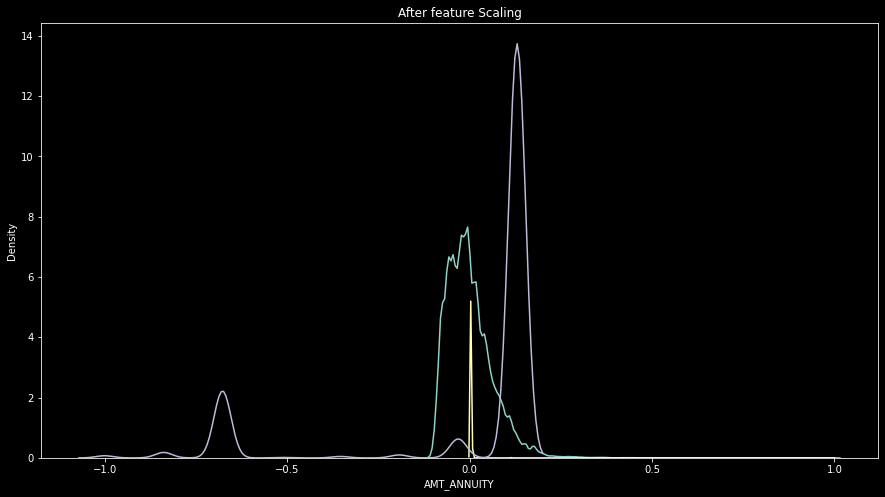

In [16]:
import seaborn as sns
plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.set_title('After feature Scaling')
sns.kdeplot(X_train_pd_scal['AMT_ANNUITY'], ax=ax)
sns.kdeplot(X_train_pd_scal['AMT_INCOME_TOTAL'], ax=ax)
sns.kdeplot(X_train_pd_scal['NAME_TYPE_SUITE'], ax=ax)
plt.show()

Теперь начнем обучать

In [73]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

def train_model(data, target, n_splits = 5):
    F1_list = []
    Accuracy_list = []
    
    kf = KFold(n_splits = n_splits, shuffle = True)
    for i, (train_index, val_index) in enumerate(kf.split(data)):
        train_part = data.loc[train_index,:]
        val_part = data.loc[val_index,:]
        
        y_train = target[train_index]
        y_val = target[val_index]

        model = LogisticRegression(multi_class='ovr', l1_ratio = 0.3, class_weight = 'balanced', solver='saga', penalty = 'elasticnet', 
                                   tol=1e-3, max_iter=500, random_state=0, C = 100, n_jobs = 4)
        
        model.fit(X=train_part, y = y_train )
        val_prediction = model.predict(val_part)
        
        accuracy = metrics.accuracy_score(y_val, val_prediction)
        
        f1 = metrics.f1_score(y_val, val_prediction)
        F1_list.append(f1)
        Accuracy_list.append(accuracy)
        print( f'Fold {i}:  F1 {f1}, Accuracy {accuracy}')
        
#     print(f'MSLE average = {np.mean(msle_list)} , std ={np.std(msle_list)}  ')
    print(f'Accuracy average = {np.mean(Accuracy_list)} , std ={np.std(Accuracy_list)}  ')
    print(f'F1 average = {np.mean(F1_list)} , std ={np.std(F1_list)}  ')
    return model

In [64]:
train_model(X_train_pd_scal.fillna(0), Y_train.fillna(0), n_splits = 5)

Fold 0:  F1 0.2240047314530736, Accuracy 0.6586670568915337
Fold 1:  F1 0.2338228878871601, Accuracy 0.6573119573347208
Fold 2:  F1 0.22926485323041526, Accuracy 0.662303664921466
Fold 3:  F1 0.228649628287162, Accuracy 0.660905336411824
Fold 4:  F1 0.22678058481255062, Accuracy 0.6586127280413645
Accuracy average = 0.6595601487201819 , std =0.0017936551806389163  
F1 average = 0.22850453713407232 , std =0.0032281341209919067  


LogisticRegression(C=3, class_weight='balanced', max_iter=500,
                   multi_class='ovr', n_jobs=4, random_state=0, solver='saga',
                   tol=0.001)

В целом вышло не ужасно... (я естественно уже поиграл с параметрами)

In [34]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_train_pd_scal, Y_train, test_size=0.35, shuffle = True)

In [79]:
log_reg = LogisticRegression(multi_class='ovr', class_weight = 'balanced', solver='saga', 
                                   tol=1e-3, max_iter=500, random_state=0, C = 3, n_jobs = 4)
model = log_reg.fit(X_train_n.fillna(0), y_train_n)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

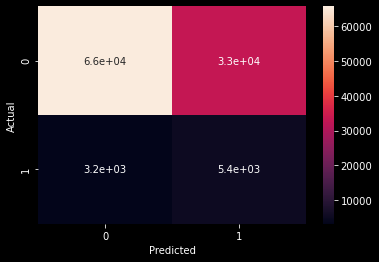

In [80]:
y_pred = model.predict(X_test_n.fillna(0))
confusion_matrix = pd.crosstab(y_test_n, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Видно, что ошибаемся мы конечно сильно (банку такое решения явно не зайдет)

In [81]:
print('Accuracy: ',metrics.accuracy_score(y_test_n, y_pred))
print('F1 score: ',metrics.f1_score(y_test_n, y_pred))

Accuracy:  0.660240269815756
F1 score:  0.22669599052613776


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

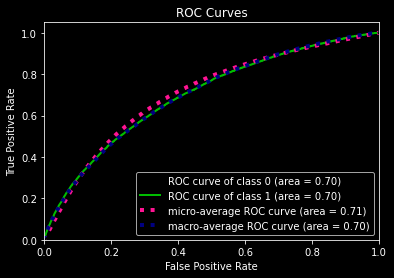

In [82]:
import scikitplot
scikitplot.metrics.plot_roc(y_test_n, model.predict_proba(X_test_n.fillna(0)))

In [83]:
log_reg = LogisticRegression(multi_class='ovr', class_weight = 'balanced', solver='saga', 
                                   tol=1e-3, max_iter=500, random_state=0, C = 3, n_jobs = 4)
model2 = log_reg.fit(X_train_pd_scal.fillna(0), Y_train)

In [84]:
predicted_test = model2.predict(X_test_pd_scal.fillna(0))

In [87]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['TARGET']= predicted_test
sample_submission.to_csv('predict.csv', index = False)

Получили скор на кегле 0.56461

#### Ухудшим результат

Можно попробовать поменять параметры логистической регресси и убрать class_weight = 'balanced', однако наша выборка сильно не сбалансирована и 1 в таргете существенно меньше, чем 0.

In [90]:
def train_model2(data, target, n_splits = 5):
    F1_list = []
    Accuracy_list = []
    
    kf = KFold(n_splits = n_splits, shuffle = True)
    for i, (train_index, val_index) in enumerate(kf.split(data)):
        train_part = data.loc[train_index,:]
        val_part = data.loc[val_index,:]
        
        y_train = target[train_index]
        y_val = target[val_index]

        model = LogisticRegression(multi_class='ovr', l1_ratio = 0.3, solver='saga', penalty = 'elasticnet', 
                                   tol=1e-3, max_iter=500, random_state=0, C = 1, n_jobs = 4)
        
        model.fit(X=train_part, y = y_train )
        val_prediction = model.predict(val_part)
        
        accuracy = metrics.accuracy_score(y_val, val_prediction)
        
        f1 = metrics.f1_score(y_val, val_prediction)
        F1_list.append(f1)
        Accuracy_list.append(accuracy)
        print( f'Fold {i}:  F1 {f1}, Accuracy {accuracy}')
        
#     print(f'MSLE average = {np.mean(msle_list)} , std ={np.std(msle_list)}  ')
    print(f'Accuracy average = {np.mean(Accuracy_list)} , std ={np.std(Accuracy_list)}  ')
    print(f'F1 average = {np.mean(F1_list)} , std ={np.std(F1_list)}  ')
    return model

In [91]:
train_model2(X_train_pd_scal.fillna(0), Y_train.fillna(0), n_splits = 5)

Fold 0:  F1 0.0020420665713702267, Accuracy 0.9205404614409053
Fold 1:  F1 0.0, Accuracy 0.9185554941302722
Fold 2:  F1 0.0007958615200955034, Accuracy 0.9183441188904425
Fold 3:  F1 0.001192131929266839, Accuracy 0.9182628207212774
Fold 4:  F1 0.0, Accuracy 0.9206855061624012
Accuracy average = 0.9192776802690596 , std =0.0010954103890650118  
F1 average = 0.0008060120041465137 , std =0.0007715352517821277  


LogisticRegression(C=1, l1_ratio=0.3, max_iter=500, multi_class='ovr', n_jobs=4,
                   penalty='elasticnet', random_state=0, solver='saga',
                   tol=0.001)

Как мы видим, наш акураси возрос аж до 0.92, зато ф1 скор провалился в некоторых местах аж до 0. Это яркий пример того, как несбалансированная выборка может показать хороший результат на акураси, но на деле быть не очень (по сути у нас сейчас если мы будем все предсказания давать 0, то акураси будет высоким, но модель то при этом так себе и поэтому ф1 скор в нашем случае информативнее и при обучении надо использовать параметр, увеличивающий вес 1 предсказаний.

In [92]:
log_reg = LogisticRegression(multi_class='ovr', solver='saga', 
                                   tol=1e-3, max_iter=500, random_state=0, C = 3, n_jobs = 4)
model3 = log_reg.fit(X_train_pd_scal.fillna(0), Y_train)

predicted_test = model3.predict(X_test_pd_scal.fillna(0))

sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['TARGET']= predicted_test
sample_submission.to_csv('predict2.csv', index = False)

Хотя на керге наш скор даже возрос 0.57094. Просто теперь мы меньше ошибаемся на 0 классе и наша ROC  кривая для него будет сильно прижата кверху.

## Попробуем иначе подготовить данные

In [144]:
new_train = train.dropna(axis = 1, thresh = 200000)

In [145]:
new_train.drop('SK_ID_CURR', 1, inplace = True)

/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [146]:
new_train

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [130]:
for col in new_train.columns:
    if col == 'TARGET': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        df, iv = calculate_woe_iv(new_train.sample(7777), col, 'TARGET')
        print(df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: NAME_CONTRACT_TYPE
             Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0       Cash loans  7018  6353  665    0.899731   0.928771 -0.031766  0.000922
1  Revolving loans   759   708   51    0.100269   0.071229  0.341957  0.009930
IV score: 0.01


WoE and IV for column: CODE_GENDER
  Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1     M  2615  2341  274    0.327458   0.436306 -0.286982  0.031237
0     F  5162  4808  354    0.672542   0.563694  0.176552  0.019217
IV score: 0.05


WoE and IV for column: FLAG_OWN_CAR
  Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0     N  5103  4696  407    0.654951   0.670511 -0.023479  0.000365
1     Y  2674  2474  200    0.345049   0.329489  0.046142  0.000718
IV score: 0.00


WoE and IV for column: FLAG_OWN_REALTY
  Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
0     Y  5400  4959  441    0.693663   0.702229 -0.012273  0.000105
1     N  2377  2

/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


       Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
8   585000.0    3     1    2    0.000139   0.003339 -3.176662  0.010164
82  191250.0    3     1    2    0.000139   0.003339 -3.176662  0.010164
61  306000.0    4     3    1    0.000418   0.001669 -1.384902  0.001733
89  387000.0    4     3    1    0.000418   0.001669 -1.384902  0.001733
57  279000.0    9     7    2    0.000975   0.003339 -1.230752  0.002909
..       ...  ...   ...  ...         ...        ...       ...       ...
9    72000.0   67    64    3    0.008916   0.005008  0.576756  0.002254
30  166500.0   48    46    2    0.006408   0.003339  0.651980  0.002001
22   54000.0   57    55    2    0.007662   0.003339  0.830672  0.003591
33   85500.0   33    32    1    0.004458   0.001669  0.982221  0.002739
18  360000.0  108   105    3    0.014628   0.005008  1.071834  0.010311

[259 rows x 8 columns]
IV score: 0.11


WoE and IV for column: AMT_CREDIT


/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


         Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
610   159264.0    3     1    2    0.000140   0.003165 -3.118426  0.009432
316   407520.0    3     1    2    0.000140   0.003165 -3.118426  0.009432
652   760131.0    3     1    2    0.000140   0.003165 -3.118426  0.009432
309    62554.5    3     1    2    0.000140   0.003165 -3.118426  0.009432
511   418500.0    3     1    2    0.000140   0.003165 -3.118426  0.009432
..         ...  ...   ...  ...         ...        ...       ...       ...
229   101880.0   25    24    1    0.003359   0.001582  0.752775  0.001337
29   1223010.0   29    28    1    0.003919   0.001582  0.906926  0.002119
46   1350000.0   66    64    2    0.008957   0.003165  1.040457  0.006027
164  1800000.0   33    32    1    0.004479   0.001582  1.040457  0.003014
140   157500.0   34    33    1    0.004619   0.001582  1.071229  0.003253

[1597 rows x 8 columns]
IV score: 0.56


WoE and IV for column: AMT_ANNUITY


/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


        Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
2446  19791.0    3     1    2    0.000140   0.003268 -3.153099  0.009864
2101  19926.0    3     1    2    0.000140   0.003268 -3.153099  0.009864
604   29785.5    3     1    2    0.000140   0.003268 -3.153099  0.009864
684   16627.5    3     1    2    0.000140   0.003268 -3.153099  0.009864
894   13131.0    3     1    2    0.000140   0.003268 -3.153099  0.009864
...       ...  ...   ...  ...         ...        ...       ...       ...
20     9000.0  175   169    6    0.023593   0.009804  0.878187  0.012110
120    6750.0   59    57    2    0.007958   0.003268  0.889952  0.004174
101   36459.0   35    34    1    0.004747   0.001634  1.066409  0.003319
81    12375.0   36    35    1    0.004886   0.001634  1.095396  0.003562
3209      NaN    0     0    0    0.000000   0.000000       NaN       NaN

[3580 rows x 8 columns]
IV score: 0.88


WoE and IV for column: AMT_GOODS_PRICE


/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


         Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
338  1165500.0    2     1    1    0.000140   0.001631 -2.457342  0.003665
285  1120500.0    2     1    1    0.000140   0.001631 -2.457342  0.003665
31   1291500.0    2     1    1    0.000140   0.001631 -2.457342  0.003665
215    49500.0    2     1    1    0.000140   0.001631 -2.457342  0.003665
304  1246500.0    2     1    1    0.000140   0.001631 -2.457342  0.003665
..         ...  ...   ...  ...         ...        ...       ...       ...
54   1800000.0   54    53    1    0.007406   0.001631  1.512950  0.008737
58    630000.0   60    59    1    0.008245   0.001631  1.620196  0.010715
47    405000.0   64    63    1    0.008804   0.001631  1.685793  0.012091
129   472500.0   75    74    1    0.010341   0.001631  1.846724  0.016084
228        NaN    0     0    0    0.000000   0.000000       NaN       NaN

[352 rows x 8 columns]
IV score: 0.33


WoE and IV for column: NAME_TYPE_SUITE
             Value   All  Good  

/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


      Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
22   -11984    4     1    3     0.00014   0.004695 -3.511896  0.015996
3526 -14981    3     1    2     0.00014   0.003130 -3.106431  0.009288
434  -12281    3     1    2     0.00014   0.003130 -3.106431  0.009288
60   -11442    3     1    2     0.00014   0.003130 -3.106431  0.009288
3819 -16964    3     1    2     0.00014   0.003130 -3.106431  0.009288
...     ...  ...   ...  ...         ...        ...       ...       ...
2131 -11629    1     1    0     0.00014   0.000000  0.000000  0.000000
2130 -11076    2     2    0     0.00028   0.000000  0.000000  0.000000
2129 -18451    1     1    0     0.00014   0.000000  0.000000  0.000000
2138 -20226    1     1    0     0.00014   0.000000  0.000000  0.000000
6179  -8697    1     1    0     0.00014   0.000000  0.000000  0.000000

[6180 rows x 8 columns]
IV score: 0.83


WoE and IV for column: DAYS_EMPLOYED


/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


       Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1158    -628     3     1    2    0.000139   0.003311 -3.167652  0.010047
87      -699     3     1    2    0.000139   0.003311 -3.167652  0.010047
1384   -3761     3     1    2    0.000139   0.003311 -3.167652  0.010047
2601    -234     3     1    2    0.000139   0.003311 -3.167652  0.010047
1586   -1290     3     1    2    0.000139   0.003311 -3.167652  0.010047
...      ...   ...   ...  ...         ...        ...       ...       ...
1348   -4790     1     1    0    0.000139   0.000000  0.000000  0.000000
1349   -1026     1     1    0    0.000139   0.000000  0.000000  0.000000
1337   -7974     2     2    0    0.000279   0.000000  0.000000  0.000000
3708   -4083     1     1    0    0.000139   0.000000  0.000000  0.000000
8     365243  1385  1314   71    0.183187   0.117550  0.443646  0.029120

[3709 rows x 8 columns]
IV score: 1.12


WoE and IV for column: DAYS_REGISTRATION


/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


        Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
522   -4487.0    3     1    2     0.00014   0.003101 -3.096244  0.009167
746   -4068.0    3     1    2     0.00014   0.003101 -3.096244  0.009167
241   -2803.0    3     1    2     0.00014   0.003101 -3.096244  0.009167
1918  -4896.0    3     1    2     0.00014   0.003101 -3.096244  0.009167
1957  -3193.0    3     1    2     0.00014   0.003101 -3.096244  0.009167
...       ...  ...   ...  ...         ...        ...       ...       ...
1991  -7447.0    1     1    0     0.00014   0.000000  0.000000  0.000000
1990   -423.0    2     2    0     0.00028   0.000000  0.000000  0.000000
1989 -11767.0    1     1    0     0.00014   0.000000  0.000000  0.000000
1997  -5272.0    1     1    0     0.00014   0.000000  0.000000  0.000000
5709  -5624.0    1     1    0     0.00014   0.000000  0.000000  0.000000

[5710 rows x 8 columns]
IV score: 0.93


WoE and IV for column: DAYS_ID_PUBLISH


/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


      Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
123    -868    4     1    3    0.000141   0.004392 -3.439122  0.014621
1802  -1202    4     1    3    0.000141   0.004392 -3.439122  0.014621
138   -3883    4     1    3    0.000141   0.004392 -3.439122  0.014621
2578  -2576    3     1    2    0.000141   0.002928 -3.033657  0.008456
1147  -3855    3     1    2    0.000141   0.002928 -3.033657  0.008456
...     ...  ...   ...  ...         ...        ...       ...       ...
1446   -754    1     1    0    0.000141   0.000000  0.000000  0.000000
1448  -5230    1     1    0    0.000141   0.000000  0.000000  0.000000
1449  -3106    1     1    0    0.000141   0.000000  0.000000  0.000000
1355    -47    1     1    0    0.000141   0.000000  0.000000  0.000000
3941  -3569    1     0    1    0.000000   0.001464  0.000000 -0.000000

[3942 rows x 8 columns]
IV score: 1.23


WoE and IV for column: FLAG_MOBIL
   Value   All  Good  Bad  Distr_Good  Distr_Bad  WoE   IV
0      1  777

   Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1      1   375   330   45    0.046102   0.072698 -0.455450  0.012113
0      0  7402  6828  574    0.953898   0.927302  0.028277  0.000752
IV score: 0.01


WoE and IV for column: LIVE_REGION_NOT_WORK_REGION
   Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1      1   328   295   33    0.041398   0.050691 -0.202528  0.001882
0      0  7449  6831  618    0.958602   0.949309  0.009742  0.000091
IV score: 0.00


WoE and IV for column: REG_CITY_NOT_LIVE_CITY
   Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1      1   603   527   76    0.074079    0.11463 -0.436578  0.017704
0      0  7174  6587  587    0.925921    0.88537  0.044784  0.001816
IV score: 0.02


WoE and IV for column: REG_CITY_NOT_WORK_CITY
   Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1      1  1800  1609  191    0.225255   0.301262 -0.290744  0.022098
0      0  5977  5534  443    0.774745   0.69873

/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


         Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
3158  0.630337    2     1    1    0.000141   0.001506 -2.369145  0.003234
231   0.160405    4     2    2    0.000282   0.003012 -2.369145  0.006468
680   0.526077    2     1    1    0.000141   0.001506 -2.369145  0.003234
2729  0.516391    2     1    1    0.000141   0.001506 -2.369145  0.003234
4499  0.558604    2     1    1    0.000141   0.001506 -2.369145  0.003234
...        ...  ...   ...  ...         ...        ...       ...       ...
2452  0.681086    1     1    0    0.000141   0.000000  0.000000  0.000000
2451  0.400605    1     1    0    0.000141   0.000000  0.000000  0.000000
2449  0.583597    1     1    0    0.000141   0.000000  0.000000  0.000000
7337  0.478945    1     1    0    0.000141   0.000000  0.000000  0.000000
396        NaN    0     0    0    0.000000   0.000000       NaN       NaN

[7338 rows x 8 columns]
IV score: 0.13


WoE and IV for column: EXT_SOURCE_3


/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


        Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
537  0.076984    3     1    2    0.000174   0.003899 -3.110348  0.011585
299  0.058032    3     1    2    0.000174   0.003899 -3.110348  0.011585
339  0.098859    3     1    2    0.000174   0.003899 -3.110348  0.011585
547  0.197475    3     1    2    0.000174   0.003899 -3.110348  0.011585
508  0.101459    3     1    2    0.000174   0.003899 -3.110348  0.011585
..        ...  ...   ...  ...         ...        ...       ...       ...
136  0.656158   29    28    1    0.004867   0.001949  0.915004  0.002670
326  0.562060   29    28    1    0.004867   0.001949  0.915004  0.002670
153  0.684828   29    28    1    0.004867   0.001949  0.915004  0.002670
22   0.576209   41    40    1    0.006953   0.001949  1.271679  0.006363
1         NaN    0     0    0    0.000000   0.000000       NaN       NaN

[616 rows x 8 columns]
IV score: 0.66


WoE and IV for column: OBS_30_CNT_SOCIAL_CIRCLE
    Value   All  Good  Bad  Distr_G

/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


       Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
1346  -335.0    4     1    3    0.000140   0.004769 -3.529069  0.016338
1431  -382.0    4     1    3    0.000140   0.004769 -3.529069  0.016338
1498  -786.0    3     1    2    0.000140   0.003180 -3.123604  0.009495
575   -342.0    3     1    2    0.000140   0.003180 -3.123604  0.009495
1480 -1291.0    3     1    2    0.000140   0.003180 -3.123604  0.009495
...      ...  ...   ...  ...         ...        ...       ...       ...
2517 -1336.0    1     1    0    0.000140   0.000000  0.000000  0.000000
545     -6.0   14    13    1    0.001819   0.001590  0.134493  0.000031
221     -2.0   60    56    4    0.007834   0.006359  0.208601  0.000308
51      -1.0   85    80    5    0.011192   0.007949  0.342132  0.001109
62      -3.0   42    40    2    0.005596   0.003180  0.565276  0.001366

[2518 rows x 8 columns]
IV score: 1.03


WoE and IV for column: FLAG_DOCUMENT_2
   Value   All  Good  Bad  Distr_Good  Distr_Bad  WoE  

    Value   All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
10    8.0    56    49    7    0.007970   0.012590 -0.457204  0.002112
8     7.0    95    84   11    0.013663   0.019784 -0.370192  0.002266
1     4.0   467   425   42    0.069128   0.075540 -0.088694  0.000569
6     5.0   316   288   28    0.046845   0.050360 -0.072358  0.000254
7     2.0  1234  1125  109    0.182986   0.196043 -0.068923  0.000900
4     3.0   817   748   69    0.121666   0.124101 -0.019817  0.000048
11   12.0     1     1    0    0.000163   0.000000  0.000000  0.000000
2     6.0   196   180   16    0.029278   0.028777  0.017254  0.000009
5     0.0  1869  1722  147    0.280091   0.264388  0.057695  0.000906
0     1.0  1634  1508  126    0.245283   0.226619  0.079144  0.001477
9     9.0    19    18    1    0.002928   0.001799  0.487258  0.000550
3     NaN     0     0    0    0.000000   0.000000       NaN       NaN
IV score: 0.01




Выпишу самые влиятельные фичи:

AMT_INCOME_TOTAL - 0.11

AMT_CREDIT - 0.56

AMT_ANNUITY - 0.88

AMT_GOODS_PRICE - 0.33

REGION_POPULATION_RELATIVE - 0.2

DAYS_BIRTH - 0.83

DAYS_EMPLOYED - 1.12

DAYS_REGISTRATION - 0.93

DAYS_ID_PUBLISH - 1.23

ORGANIZATION_TYPE - 0.12

EXT_SOURCE_2 - 0.13

EXT_SOURCE_3 - 0.66

DAYS_LAST_PHONE_CHANGE - 1.03

In [147]:
new_train_X = new_train[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                      'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE']]

In [148]:
new_test = test[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
                      'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE']]

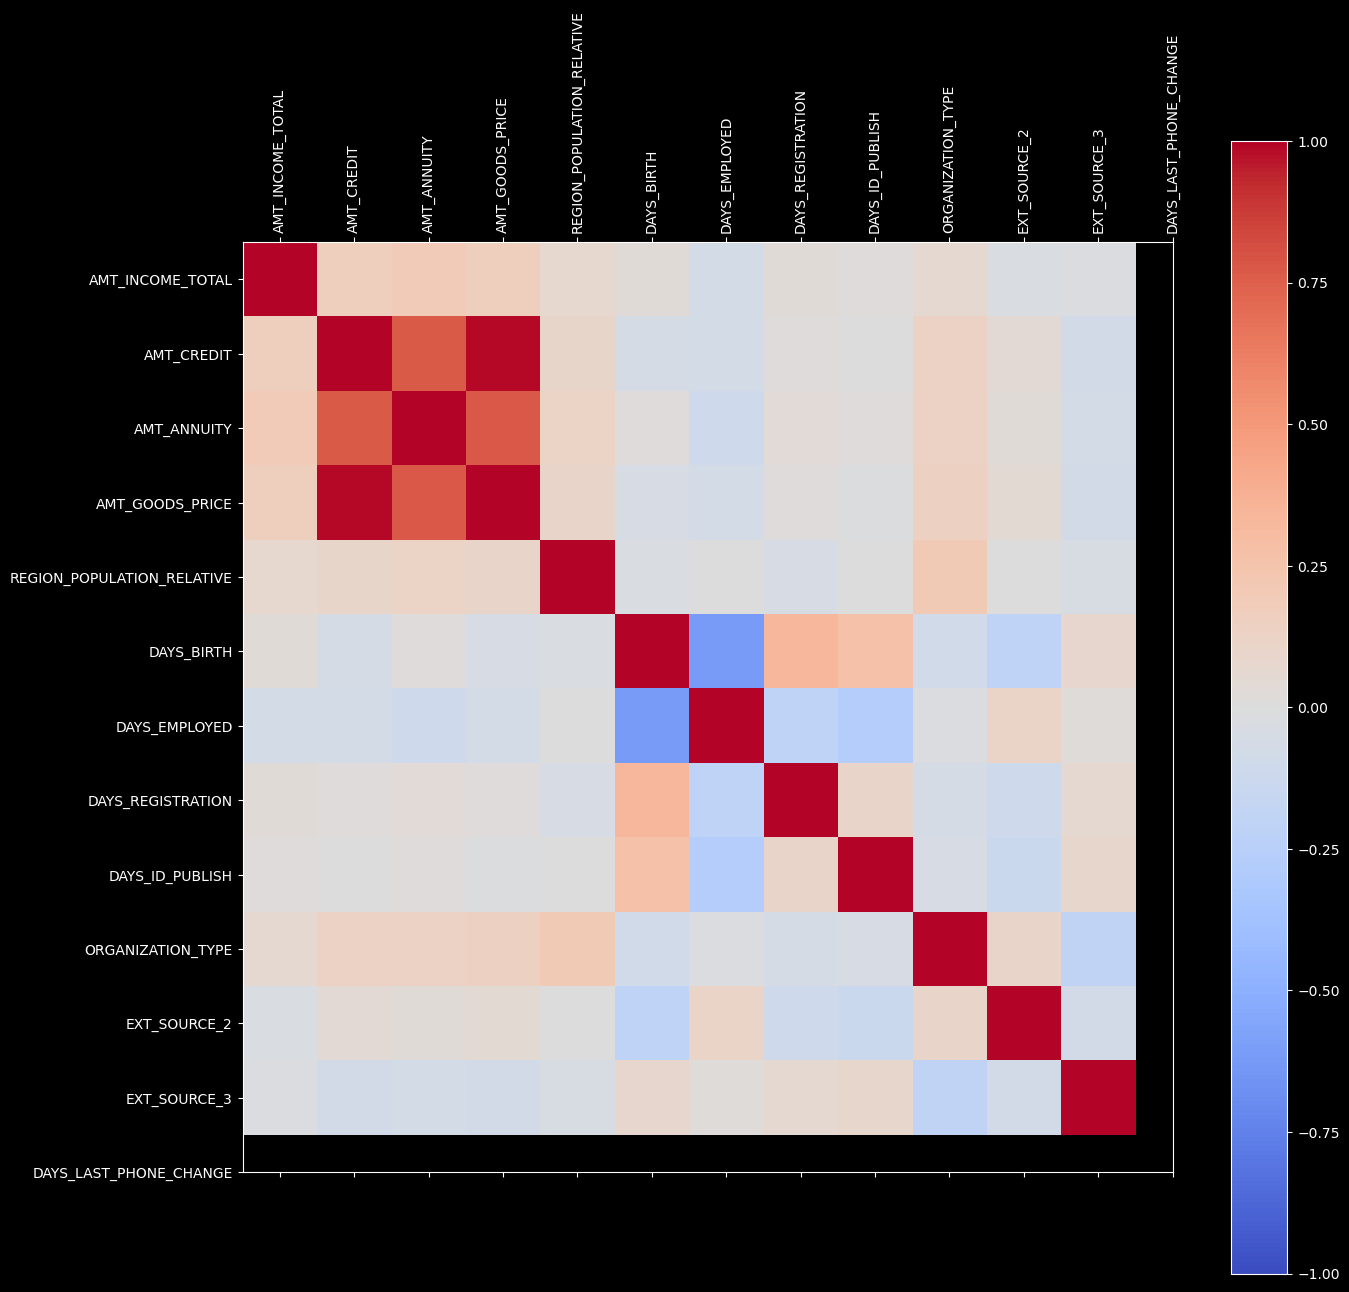

In [151]:
corr = new_train_X.corr()
fig = plt.figure(figsize=[15, 15], dpi=100)
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(new_train_X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(new_train_X.columns)
ax.set_yticklabels(new_train_X.columns)
plt.show()

In [150]:
new_train_X

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,Business Entity Type 3,0.262949,0.139376,-1134.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,School,0.622246,NaN,-828.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,Government,0.555912,0.729567,-815.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,Business Entity Type 3,0.650442,NaN,-617.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,Religion,0.322738,NaN,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,Services,0.681632,NaN,-273.0
307507,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,XNA,0.115992,NaN,0.0
307508,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,School,0.535722,0.218859,-1909.0
307509,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,Business Entity Type 1,0.514163,0.661024,-322.0


In [152]:
encoder = preprocessing.OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1)
new_train_X['ORGANIZATION_TYPE'] = encoder.fit_transform(new_train_X['ORGANIZATION_TYPE'].fillna('').to_numpy().reshape(-1, 1))
new_test['ORGANIZATION_TYPE'] = encoder.transform(new_test[i].fillna('').to_numpy().reshape(-1, 1))

<ipython-input-152-defbd3b93b72>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_train_X['ORGANIZATION_TYPE'] = encoder.fit_transform(new_train_X['ORGANIZATION_TYPE'].fillna('').to_numpy().reshape(-1, 1))
<ipython-input-152-defbd3b93b72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_test['ORGANIZATION_TYPE'] = encoder.transform(new_test[i].fillna('').to_numpy().reshape(-1, 1))


In [153]:
new_train_X.fillna(0, inplace = True)
new_test.fillna(0, inplace = True)

/home/maxim/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [157]:
scaler = StandardScaler()
X_train_scal = scaler.fit_transform(new_train_X)
X_test_scal = scaler.transform(new_test)

X_train_pd_scal = pd.DataFrame(X_train_scal, columns=new_train_X.columns)
X_test_pd_scal = pd.DataFrame(scaler.transform(X_test_scal), columns = new_test.columns)

transformer = preprocessing.MaxAbsScaler()
X_train_pd_scal = pd.DataFrame(transformer.fit_transform(X_train_pd_scal),columns=X_train_pd_scal.columns)
X_test_pd_scal = pd.DataFrame(transformer.transform(X_test_pd_scal),columns=X_test_pd_scal.columns)

In [159]:
X_train_pd_scal.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05,3.075110e+05
mean,5.006027e-19,-1.395383e-17,-4.151454e-19,5.725432e-18,7.300963e-17,1.657269e-17,1.917900e-17,1.020207e-20,2.457495e-17,1.733880e-15,2.424315e-16,-1.776225e-16,2.275878e-17
std,2.029622e-03,1.166311e-01,6.276880e-02,1.052461e-01,2.678410e-01,4.747592e-01,4.686883e-01,1.789550e-01,3.591537e-01,6.948475e-01,3.747090e-01,5.513112e-01,2.483548e-01
min,-1.225254e-03,-1.605419e-01,-1.173902e-01,-1.531593e-01,-3.984926e-01,-1.000000e+00,-2.711329e-01,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-8.419931e-01,-1.000000e+00
25%,-4.818740e-04,-9.534294e-02,-4.583236e-02,-8.525107e-02,-2.103434e-01,-3.965408e-01,-2.208655e-01,-1.266583e-01,-3.104593e-01,-8.302232e-01,-2.386693e-01,-4.745020e-01,-1.823725e-01
50%,-1.852923e-04,-2.477417e-02,-9.546749e-03,-2.503053e-02,-3.908049e-02,3.122225e-02,-2.157333e-01,2.449067e-02,-6.181540e-02,1.205270e-01,1.016553e-01,1.030266e-01,6.183440e-02
75%,2.884681e-04,6.074343e-02,3.242919e-02,4.031517e-02,1.509470e-01,3.942551e-01,-2.126679e-01,1.511805e-01,3.031796e-01,5.959020e-01,2.924926e-01,4.662525e-01,2.069167e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.299380e-01,1.000000e+00,2.532841e-01,7.124308e-01,9.354556e-01,6.657288e-01,1.000000e+00,2.892202e-01


In [174]:
def train_model(data, target, n_splits = 5):
    F1_list = []
    Accuracy_list = []
    
    kf = KFold(n_splits = n_splits, shuffle = True)
    for i, (train_index, val_index) in enumerate(kf.split(data)):
        train_part = data.loc[train_index,:]
        val_part = data.loc[val_index,:]
        
        y_train = target[train_index]
        y_val = target[val_index]

#         model = LogisticRegression(multi_class='ovr', l1_ratio = 0.3, class_weight = 'balanced', solver='saga', penalty = 'elasticnet', 
#                                    tol=1e-3, max_iter=500, random_state=0, C = 100, n_jobs = 4)

        model = LogisticRegression(class_weight = 'balanced', solver='sag', tol=1e-4, max_iter=5000, random_state=0, C = 1, n_jobs = 4)
        
        model.fit(X=train_part, y = y_train )
        val_prediction = model.predict(val_part)
        
        accuracy = metrics.accuracy_score(y_val, val_prediction)
        
        f1 = metrics.f1_score(y_val, val_prediction)
        F1_list.append(f1)
        Accuracy_list.append(accuracy)
        print( f'Fold {i}:  F1 {f1}, Accuracy {accuracy}')
        
#     print(f'MSLE average = {np.mean(msle_list)} , std ={np.std(msle_list)}  ')
    print(f'Accuracy average = {np.mean(Accuracy_list)} , std ={np.std(Accuracy_list)}  ')
    print(f'F1 average = {np.mean(F1_list)} , std ={np.std(F1_list)}  ')
    return model

In [161]:
train_model(X_train_pd_scal, new_train.TARGET, n_splits = 5)

Fold 0:  F1 0.23497107710331697, Accuracy 0.660244215729314
Fold 1:  F1 0.2348573092603378, Accuracy 0.6582224968293714
Fold 2:  F1 0.23309143686502176, Accuracy 0.6563363793047381
Fold 3:  F1 0.23307109771340342, Accuracy 0.6607915189749927
Fold 4:  F1 0.22560118386977432, Accuracy 0.6596533446066795
Accuracy average = 0.6590495910890191 , std =0.0016044664036322397  
F1 average = 0.23231842096237085 , std =0.003457394638368709  


LogisticRegression(C=100, class_weight='balanced', l1_ratio=0.3, max_iter=500,
                   multi_class='ovr', n_jobs=4, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.001)

In [163]:
train_model(X_train_pd_scal, new_train.TARGET, n_splits = 5)

Fold 0:  F1 0.0, Accuracy 0.9199388647708242
Fold 1:  F1 0.0003979307600477517, Accuracy 0.9183115996227765
Fold 2:  F1 0.0, Accuracy 0.919888784104582
Fold 3:  F1 0.0, Accuracy 0.9185554941302722
Fold 4:  F1 0.0, Accuracy 0.9194985528925889
Accuracy average = 0.9192386591042088 , std =0.0006792126230623813  
F1 average = 7.958615200955034e-05 , std =0.0001591723040191007  


LogisticRegression(C=100, max_iter=500, n_jobs=4, random_state=0, solver='saga',
                   tol=0.001)

In [175]:
train_model(X_train_pd_scal, new_train.TARGET, n_splits = 5)

Fold 0:  F1 0.23394662206384992, Accuracy 0.6574476041819098
Fold 1:  F1 0.23764195670550187, Accuracy 0.6627264154011252
Fold 2:  F1 0.22943435238517207, Accuracy 0.6606614419043283
Fold 3:  F1 0.2311363719167851, Accuracy 0.6568729472212286
Fold 4:  F1 0.23045387994143487, Accuracy 0.6581574582940393
Accuracy average = 0.6591731734005262 , std =0.0021973064709292743  
F1 average = 0.23252263660254874 , std =0.0029656080732184866  


LogisticRegression(C=1, class_weight='balanced', max_iter=5000, n_jobs=4,
                   random_state=0, solver='sag')

In [180]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_train_pd_scal, new_train.TARGET, test_size=0.35, shuffle = True)

In [196]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0, scoring = 'roc_auc', solver='lbfgs', tol=1e-4, max_iter=5000, n_jobs = 4,class_weight = 'balanced' ).fit(X_train_n, y_train_n)

In [197]:
clf.score(X_test_n, y_test_n)

0.6994365433721793

In [198]:
metrics.accuracy_score(clf.predict(X_test_n), y_test_n)

0.658140464001338

In [199]:
metrics.f1_score(clf.predict(X_test_n), y_test_n)

0.23008997698263234

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

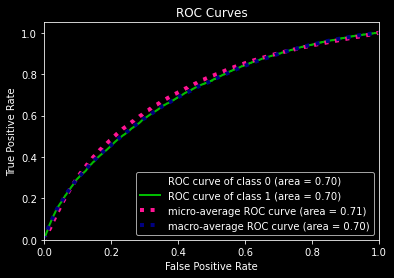

In [205]:
scikitplot.metrics.plot_roc(y_test_n, clf.predict_proba(X_test_n))

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

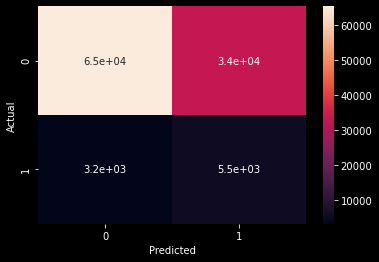

In [203]:
confusion_matrix = pd.crosstab(y_test_n, clf.predict(X_test_n), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [206]:
clf2 = LogisticRegressionCV(cv=5, random_state=0, scoring = 'roc_auc', solver='lbfgs', tol=1e-4, max_iter=5000, n_jobs = 4).fit(X_train_n, y_train_n)

In [207]:
clf2.score(X_test_n, y_test_n)

0.6990792248894193

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

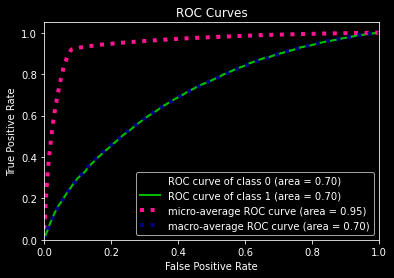

In [208]:
scikitplot.metrics.plot_roc(y_test_n, clf2.predict_proba(X_test_n))

Наш результат не улучшился но и не ухудшился. Следовательно мы не зря выкинули все остальные фичи, так как теперь регрессия должна сходиться быстрее и вычислительнее менее сложна.

Плюс максимизация по метрике рок-аук не принесла лучшего результата, по сравению с Ф1 скор.

In [210]:
clf3 = LogisticRegressionCV(cv=5, random_state=0, scoring = 'roc_auc', solver='lbfgs', tol=1e-4, max_iter=5000, n_jobs = 4).fit(X_train_pd_scal, new_train.TARGET)

In [211]:
last_hope = clf3.predict(X_test_pd_scal)

In [212]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['TARGET']= last_hope
sample_submission.to_csv('predict3.csv', index = False)

Скор в лидерборде возрос однако, но очень несущественно: 0.59117